# Breast Cancer Data Analysis and Predictions

##Introduction
This notebook presents an analysis of breast cancer data with the aim of building and evaluating classification models to distinguish between benign and malignant tumors. Leveraging features extracted from digitized images of fine needle aspirate (FNA) samples, we will explore the dataset, preprocess the data, and train three different classification models: Logistic Regression, K Nearest Neighbours, and Support Vector Machines (SVM) to predict the diagnosis.

# About Data Set


**Overview**

This dataset contains features extracted from digitized images of fine needle aspirate (FNA) samples of breast masses. The dataset is used to classify tumors as either malignant or benign based on characteristics of the cell nuclei present in the images.

**Attribute Details**

Each sample is identified by an ID number and a diagnosis label:

M = Malignant (Cancerous)

B = Benign (Non-cancerous)

Additionally, 30 numerical features describe the properties of cell nuclei in each image. These features are computed based on three statistics:



1.   Mean (Average value for the feature)
2.  Standard Error (Variability in measurements)

3.   Worst (Largest) (Mean of the three highest values observed)

**Feature Descriptions**

Each cell nucleus is characterized using 10 fundamental attributes:

**Radius**: Average distance from center to boundary points.

**Texture**: Standard deviation of pixel intensity values.

**Perimeter**: Total boundary length of the nucleus.

**Area**: Total pixel count within the nucleus boundary.

**Smoothness**: Measures local variation in radius lengths.

**Compactness**: Defined as (Perimeter² / Area - 1.0).

**Concavity**: Severity of concave regions in the nucleus contour.

**Concave Points**: Total number of concave areas in the boundary.

**Symmetry**: Degree of balance between different halves of the nucleus.

**Fractal Dimension**: Metric for coastline approximation, indicating nucleus complexity.


Each of the 30 computed features corresponds to one of the above attributes, calculated for mean, standard error, and worst case.

**Data Characteristics**

Total Samples: 569 cases

Missing Values: None

Class Distribution:

Benign: 357 samples

Malignant: 212 samples

This dataset is widely used for machine learning applications in medical diagnosis, classification models, and predictive analytics for breast cancer detection.






# IMPORTING LIBRARIES

In [41]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Exploratory Data Analysis

# Download Data set

[Click Me](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)



# 1.1DATA UNDERSTANDING

In [42]:
# reading data into the dataframe
df = pd.read_csv('data.csv')

In [43]:
# displaying first five rows
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [44]:
# shape of the dataframe
df.shape

(569, 33)

In [45]:
# concise summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [46]:
# column names
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [47]:
# checking for null values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: int64

The whole column 'Unamed: 32' has NaN values.

In [48]:
# dropping 'Unnamed: 32' column.
df.drop("Unnamed: 32", axis=1, inplace=True)

In [49]:
# dropping id column
df.drop('id',axis=1, inplace=True)

In [50]:
# descriptive statistics of data
df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

## 1.2. Data Visualizations

<Axes: xlabel='diagnosis', ylabel='count'>

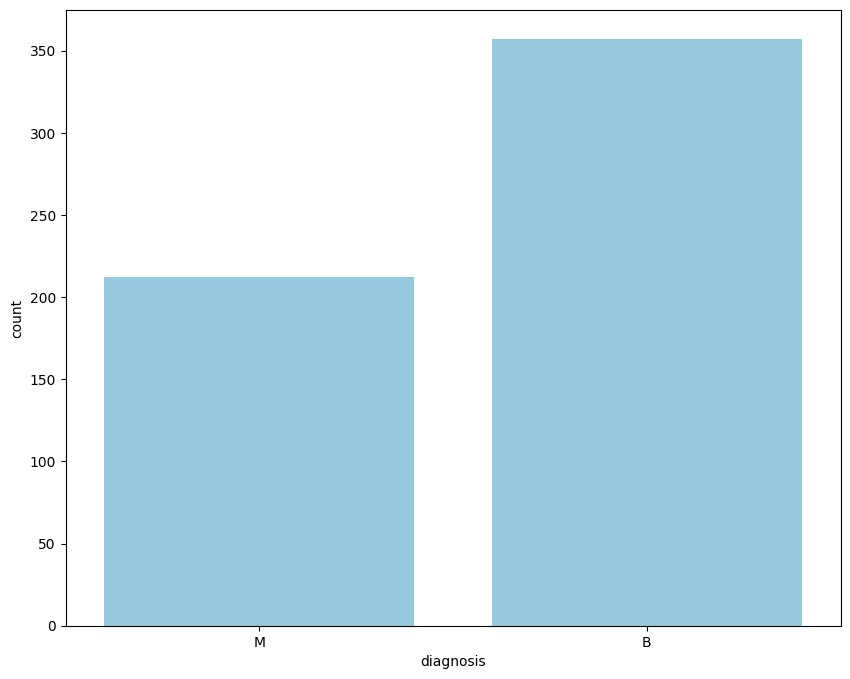

In [51]:
# countplot
plt.figure(figsize = (10,8))
sns.countplot(x="diagnosis", data=df, color='skyblue')

<Axes: >

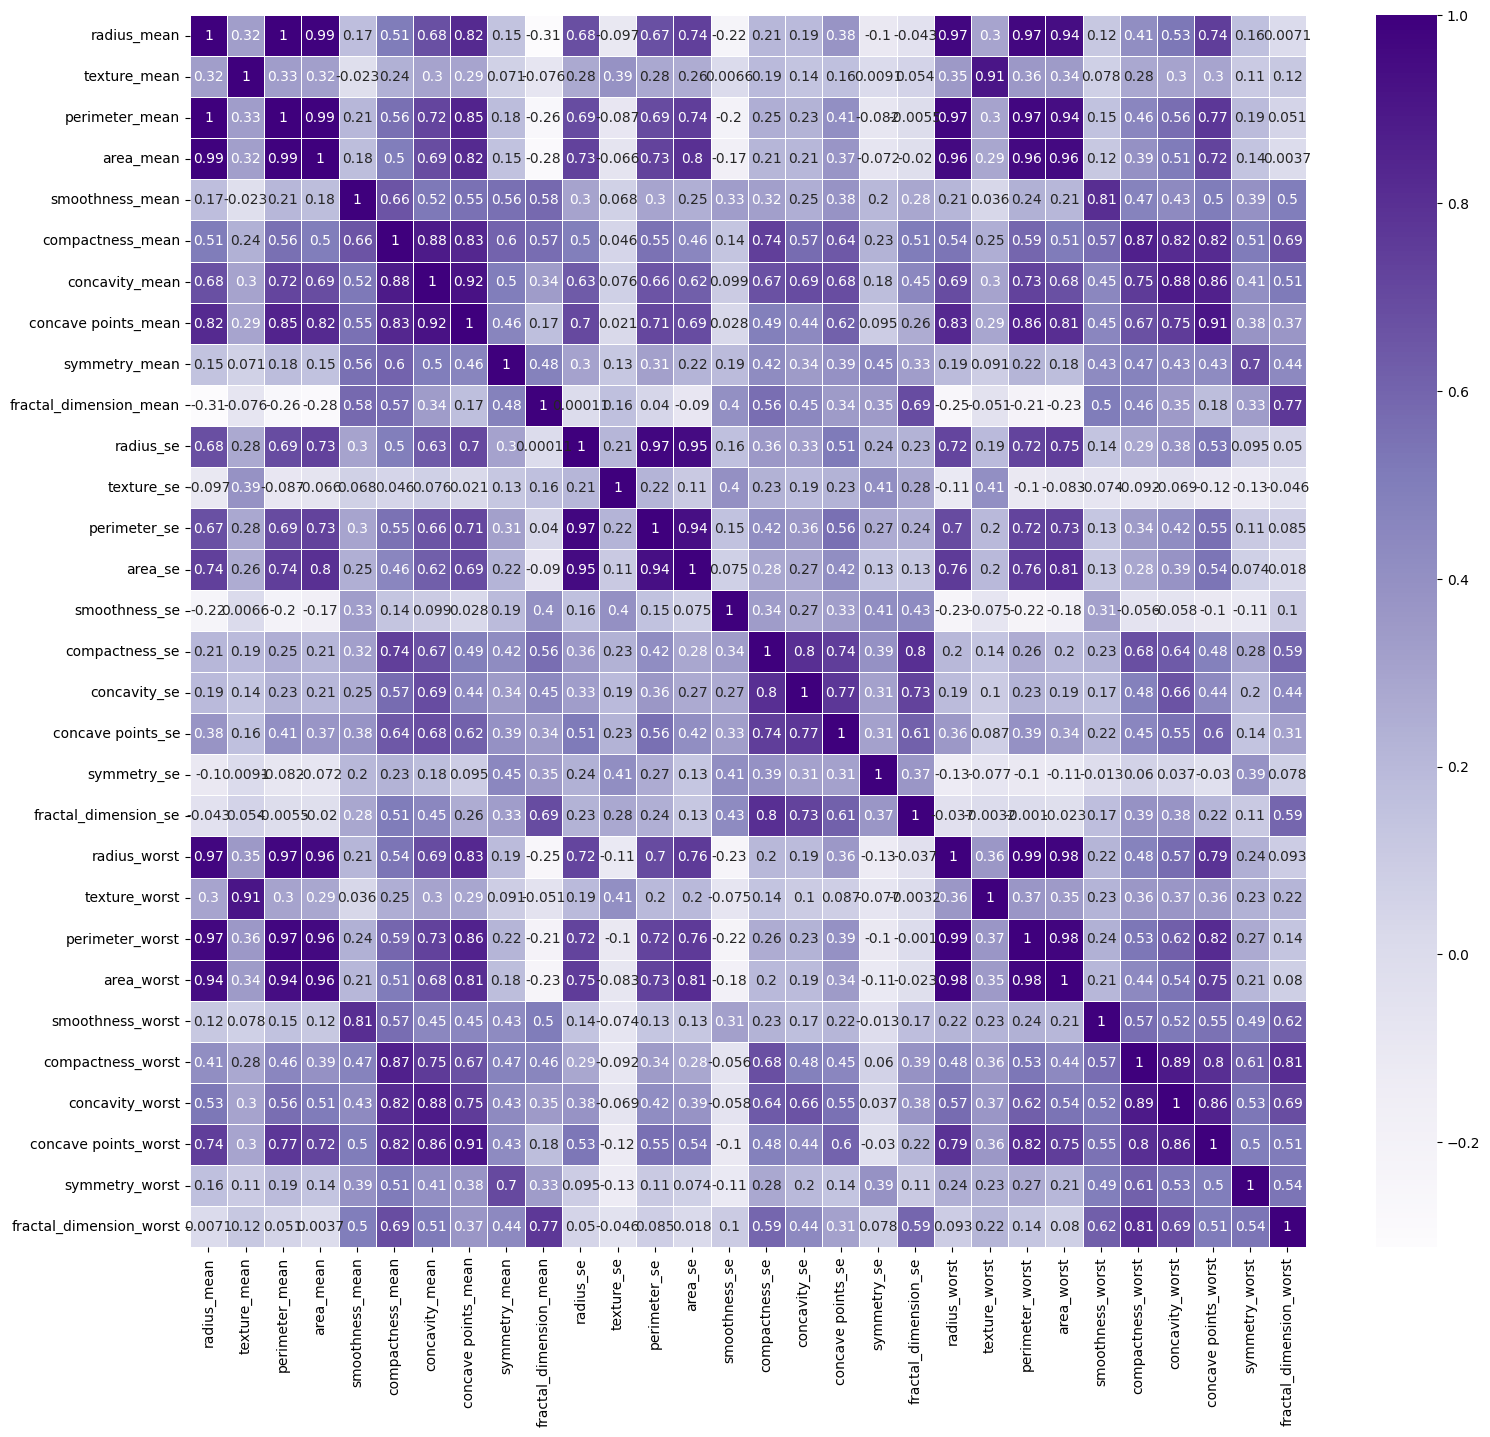

In [52]:
# heatmap
plt.figure(figsize=(18,16))
# Drop the 'diagnosis' column before calculating the correlation
sns.heatmap(df.drop('diagnosis', axis=1).corr(), annot=True,linewidths=.5, cmap="Purples")

From the heatmap, we can observe from the heatmaps that there are many negative correlations in this dataset.

In [53]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

In [55]:
# Getting Mean Columns with diagnosis
m_col = ['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# Getting Se Columns with diagnosis
s_col = ['diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']

# Getting Worst column with diagnosis
w_col = ['diagnosis','radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

### For Mean Columns

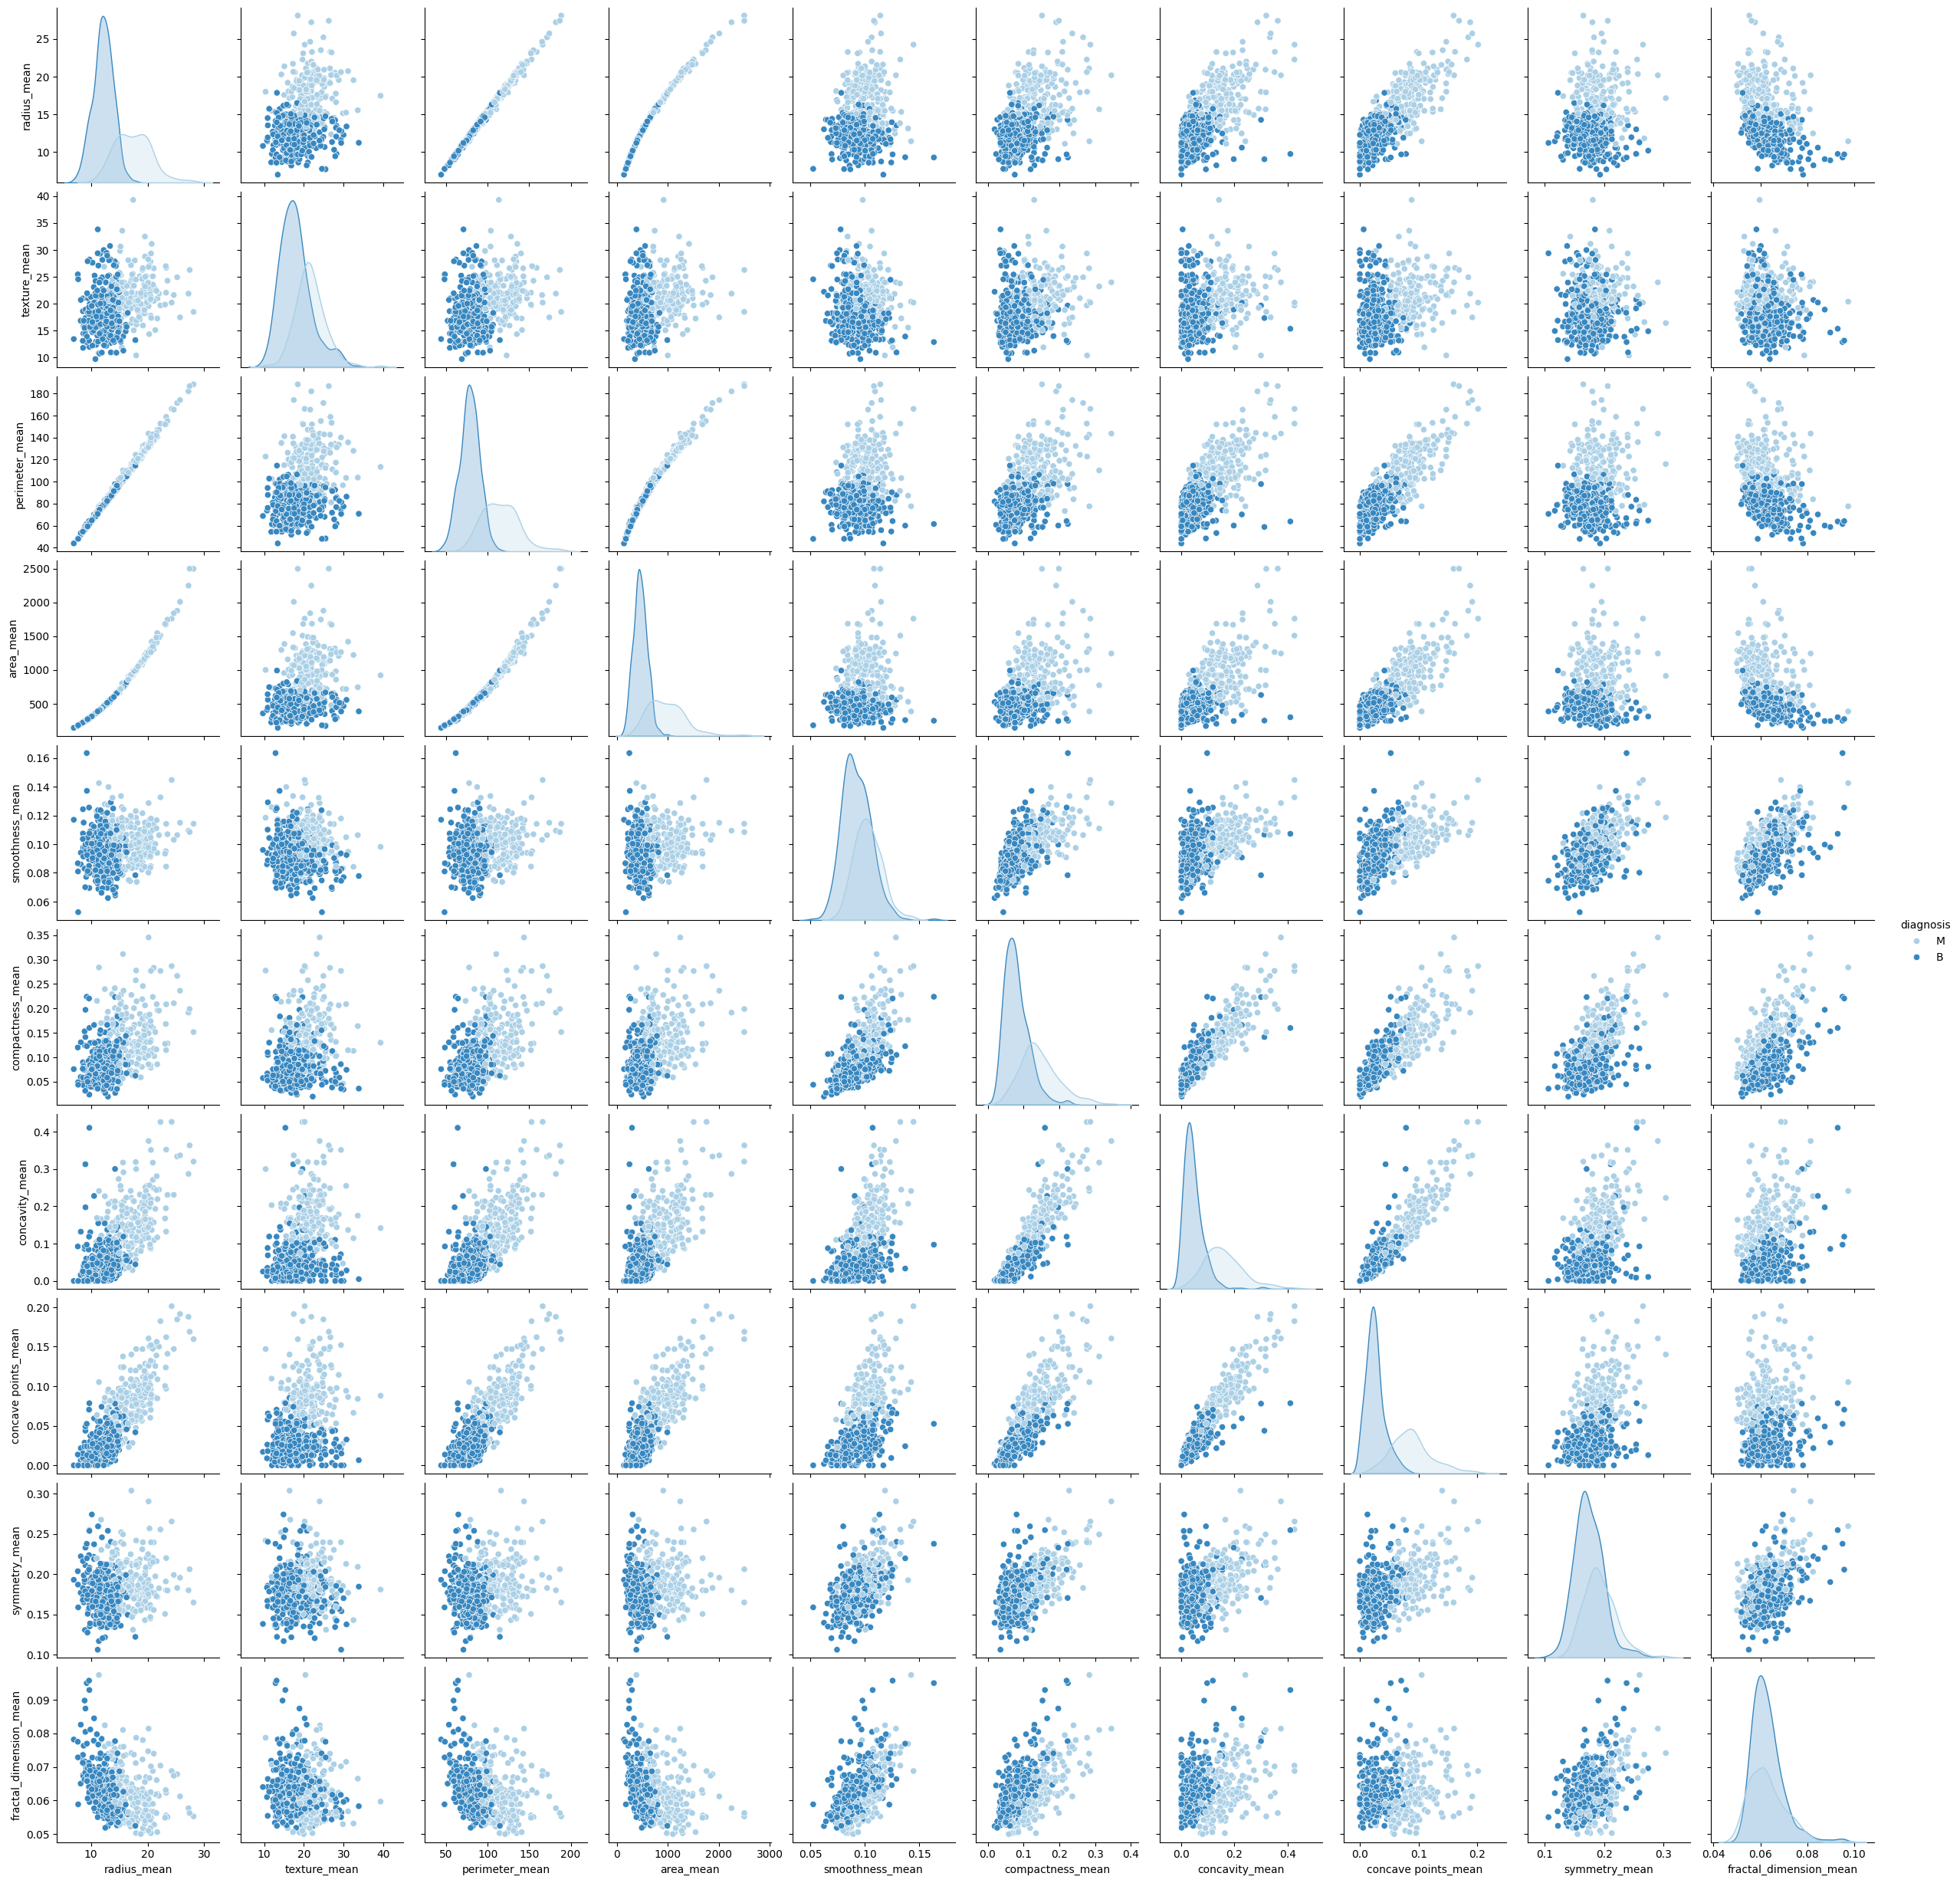

In [56]:
# pairplot for mean columns
sns.pairplot(df[m_col],hue = 'diagnosis', palette='Blues')

### For SE columns

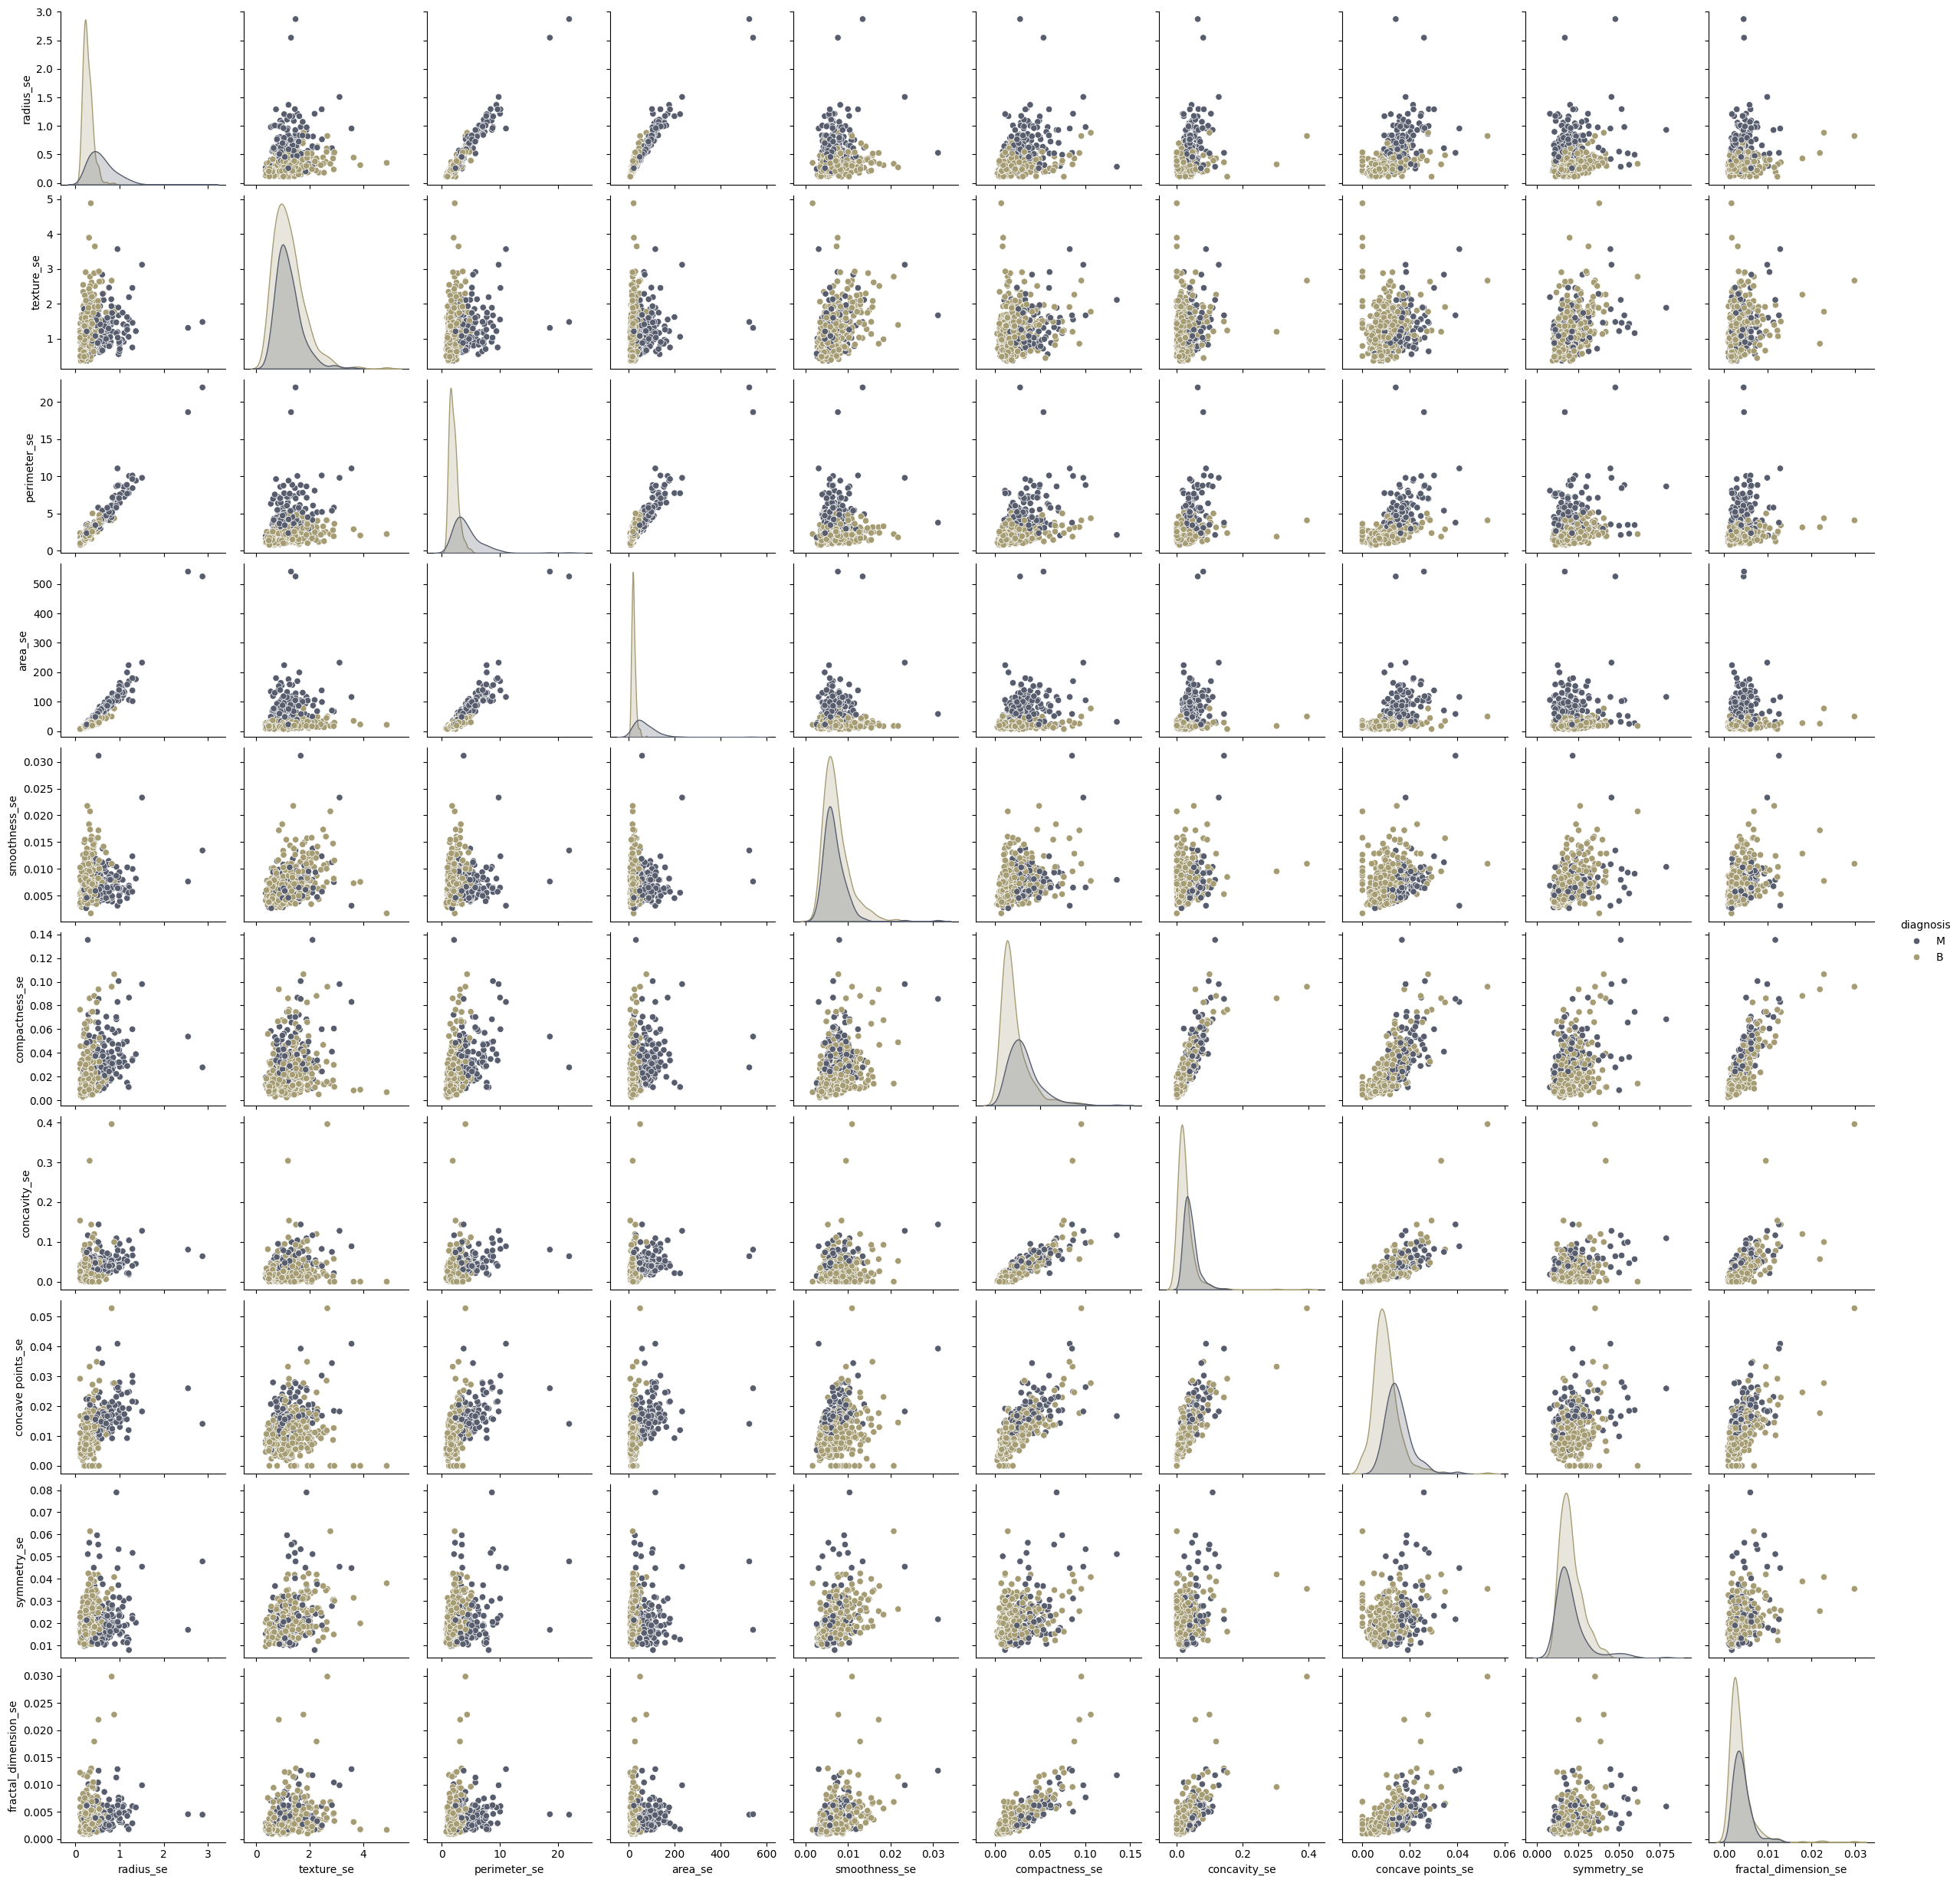

In [59]:
# pairplot for se columns
sns.pairplot(df[s_col],hue = 'diagnosis', palette='cividis')

### For Worst columns

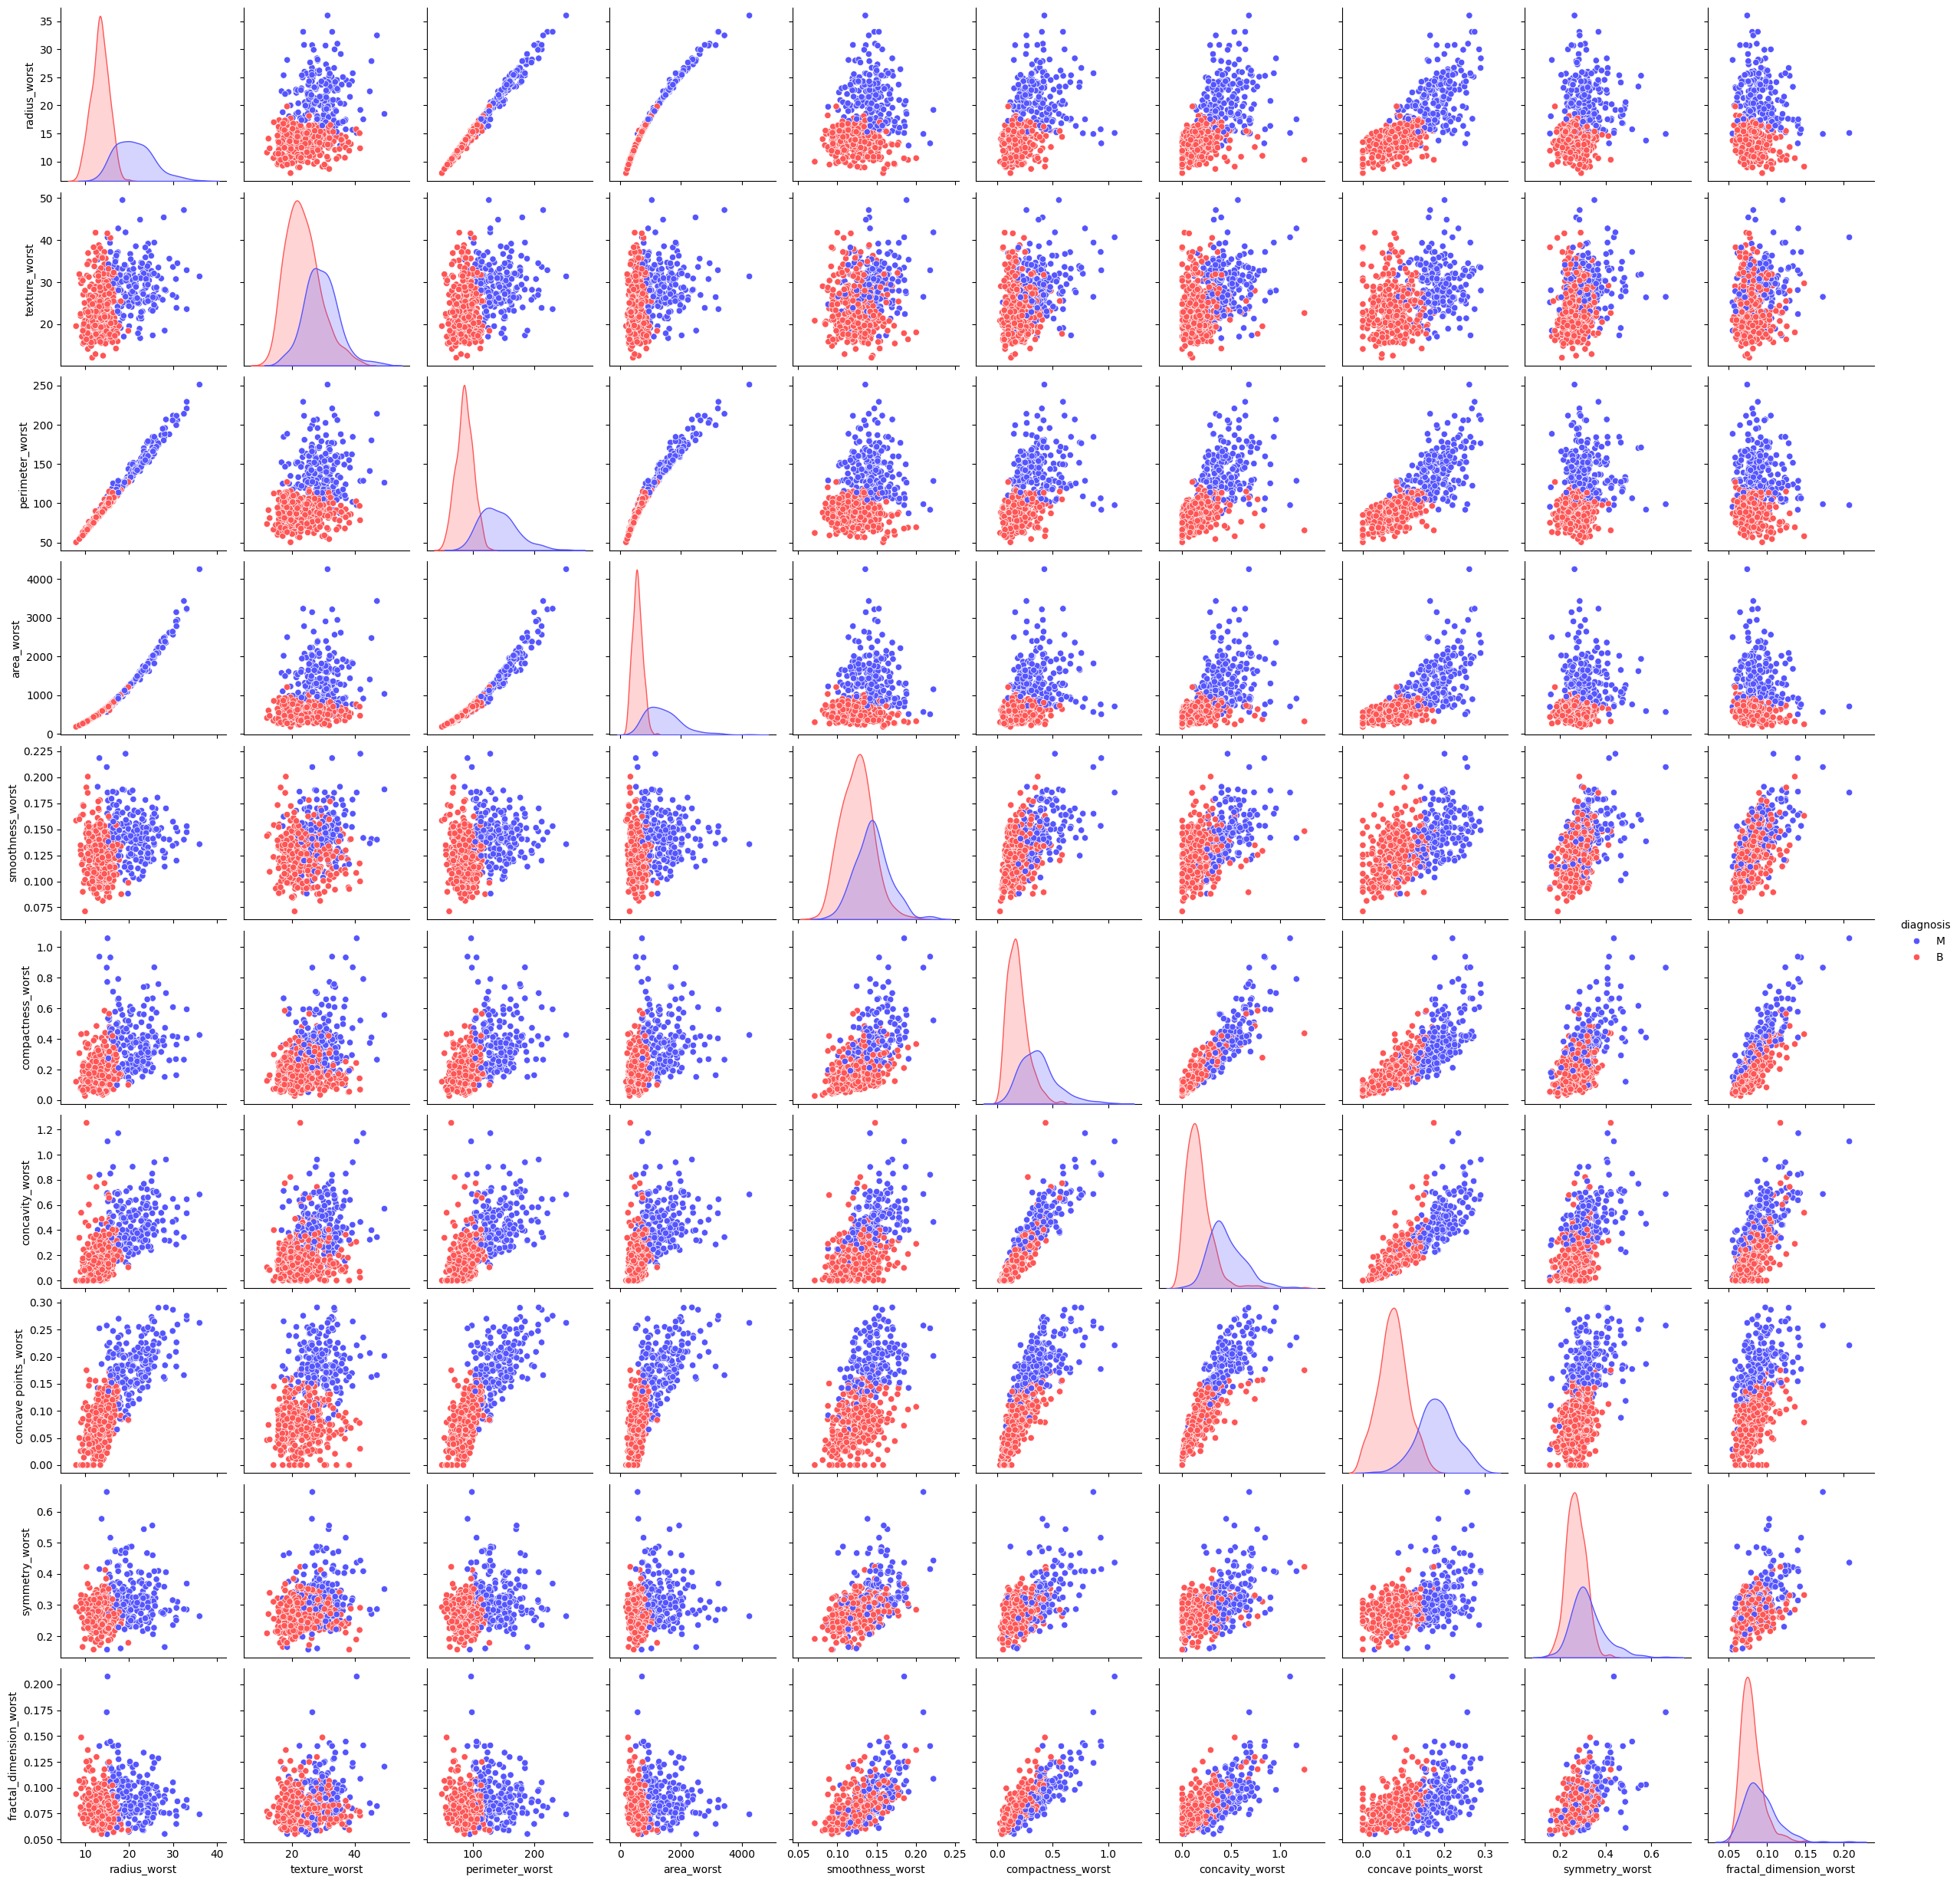

In [61]:
# pairplot for worst columns
sns.pairplot(df[w_col],hue = 'diagnosis', palette='seismic')

# 2. Data Preprocessing and Building Models

## 2.1 Data Preprocessing

In [62]:
# counts of unique rows in the 'diagnosis' column
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [63]:
# mapping categorical values to numerical values
df['diagnosis']=df['diagnosis'].map({'B':0,'M':1})

In [64]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

## 2.2 Splitting the data into train and test

In [69]:
from sklearn.model_selection import train_test_split

# splitting data
X_train, X_test, y_train, y_test = train_test_split(
                df.drop('diagnosis', axis=1),
                df['diagnosis'],
                test_size=0.2,
                random_state=42)

print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)

Shape of training set: (455, 30)
Shape of test set: (114, 30)


In [70]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance.(Unit variance means dividing all the values by the standard deviation.)

## 2.3 Classification Models

### 2.3.1 Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictions1 = logreg.predict(X_test)

<Figure size 800x600 with 0 Axes>

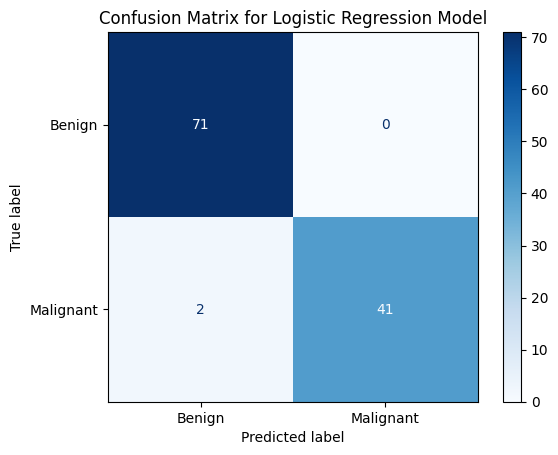



              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [75]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt # Ensure matplotlib is imported for plotting

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions1)

# Create a ConfusionMatrixDisplay object
# You can customize the cmap (color map) if desired. 'Blues', 'Purples', 'viridis' are common.
# include_values=True displays the numbers in the cells.
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
cmd.plot(cmap='Blues', include_values=True)
plt.title('Confusion Matrix for Logistic Regression Model') # Add a title
plt.show()

print('\n')
print(classification_report(y_test, predictions1))

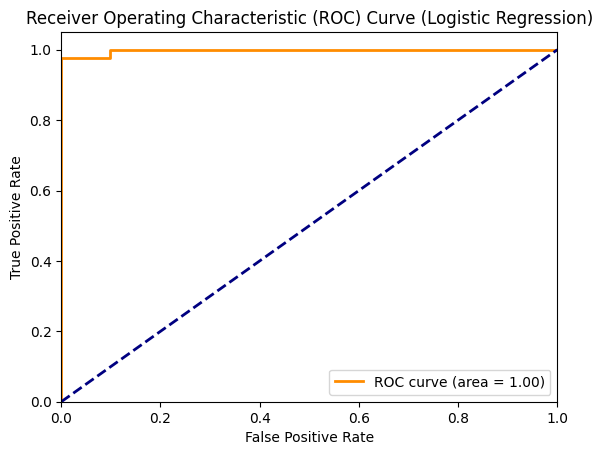

AUC for Logistic Regression: 1.00


In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
# Calculate ROC curve and AUC for Logistic Regression
y_pred_proba_logreg = logreg.predict_proba(X_test)[:, 1] # Get probabilities for the positive class

from sklearn.metrics import roc_curve, auc # Import roc_curve and auc

fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_pred_proba_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Plot ROC curve for Logistic Regression
plt.figure()
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_logreg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()

print(f"AUC for Logistic Regression: {roc_auc_logreg:.2f}")

An AUC of 1.00 for your Logistic Regression model indicates that it can perfectly distinguish between the positive and negative classes.

In [76]:
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(y_test, predictions1)
print("Accuracy of the Logistic Regression Model is: ", logreg_acc)

Accuracy of the Logistic Regression Model is:  0.9824561403508771


### 2.3.2 K Nearest Neighbours

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
# to find which value shows the lowest mean error
error_rate = []

for i in range(1,42):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

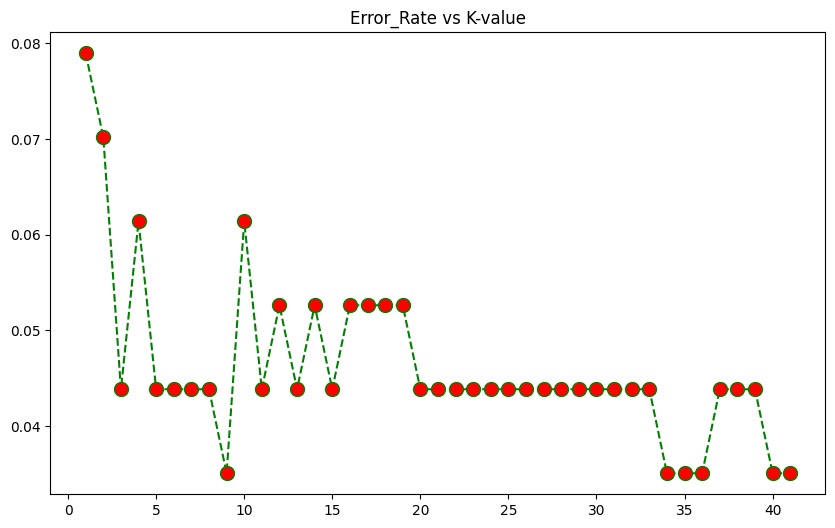

In [84]:
plt.figure(figsize=(10,6))
plt.plot(range(1,42), error_rate, color='green', linestyle="--",
         marker='o', markersize=10, markerfacecolor='r')
plt.title('Error_Rate vs K-value')
plt.show()

From this graph, K value of 9,34,35,36,40 and 41 seem to show the lowest mean error. So using one of these values

In [85]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
predictions2 = knn.predict(X_test)

<Figure size 800x600 with 0 Axes>

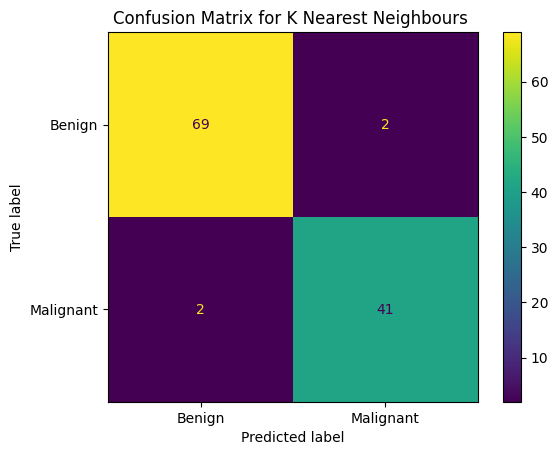



              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [86]:
cm = confusion_matrix(y_test, predictions2)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
cmd.plot(cmap='viridis', include_values=True)
plt.title('Confusion Matrix for K Nearest Neighbours ') # Add a title
plt.show()
# print(confusion_matrix(y_test, predictions2))
print("\n")
print(classification_report(y_test, predictions2))

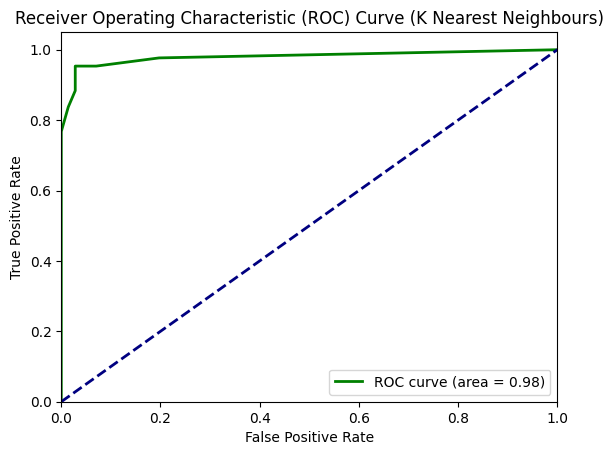

AUC for K Nearest Neighbours: 0.98


In [108]:
# Calculate ROC curve and AUC for KNN
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve for KNN
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (K Nearest Neighbours)')
plt.legend(loc="lower right")
plt.show()

print(f"AUC for K Nearest Neighbours: {roc_auc_knn:.2f}")
# --- End of ROC Curve and AUC code ---

An AUC of 0.98 for the K Nearest Neighbours model indicates that it has excellent discriminative ability, being able to distinguish between positive and negative classes almost perfectly, though slightly less so than a model with an AUC of 1.00.

In [88]:
knn_model_acc = accuracy_score(y_test, predictions2)
print("Accuracy of K Neighbors Classifier Model is: ", knn_model_acc)

Accuracy of K Neighbors Classifier Model is:  0.9649122807017544


### 2.3.3 Support Vector Machines (SVM)

In [115]:
from sklearn.svm import SVC

svc_model = SVC(kernel="rbf",probability=True)
svc_model.fit(X_train, y_train)
predictions3 = svc_model.predict(X_test)

<Figure size 800x600 with 0 Axes>

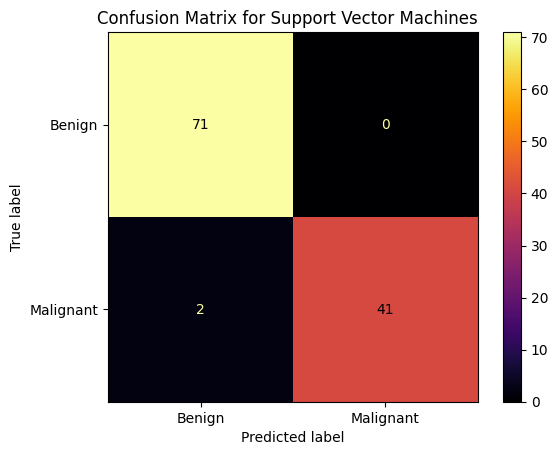



              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [116]:
# print("Confusion Matrix: \n", confusion_matrix(y_test, predictions5))
cm = confusion_matrix(y_test, predictions3)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
cmd.plot(cmap='inferno', include_values=True)
plt.title('Confusion Matrix for Support Vector Machines  ') # Add a title
plt.show()
print("\n")
print(classification_report(y_test, predictions3))

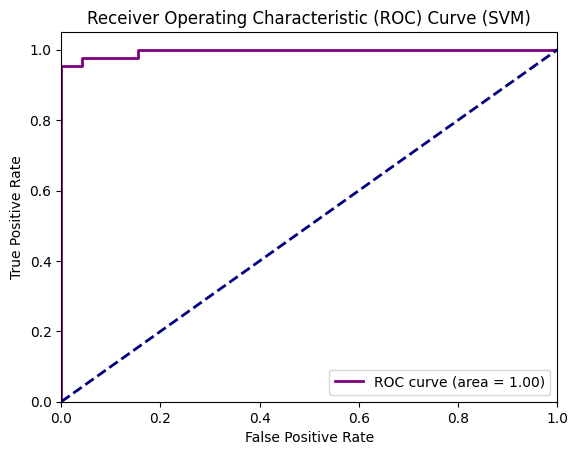

AUC for SVM: 1.00


In [118]:
#  Calculate ROC curve and AUC for SVM
y_pred_proba_svm = svc_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_curve, auc # Import roc_curve and auc

fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve for SVM
import matplotlib.pyplot as plt # Ensure matplotlib is imported for plotting
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='purple', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (SVM)')
plt.legend(loc="lower right")
plt.show()

print(f"AUC for SVM: {roc_auc_svm:.2f}")

An AUC of 1.00 for the SVM model indicates that it can perfectly distinguish between the positive and negative classes.

In [95]:
svm_acc = accuracy_score(y_test, predictions3)
print("Accuracy of SVM model is: ", svm_acc)

Accuracy of SVM model is:  0.9824561403508771


# 3. Final Results

In [121]:
print(logreg_acc)
print(knn_model_acc)
print(svm_acc)

0.9824561403508771
0.9649122807017544
0.9824561403508771


The accuracy of Logistic Regression Model is **98.24%**<br>
The accuracy of KNN model is **96.49%**<br>
The accuracy of SVM Model is **98.24%**<br>

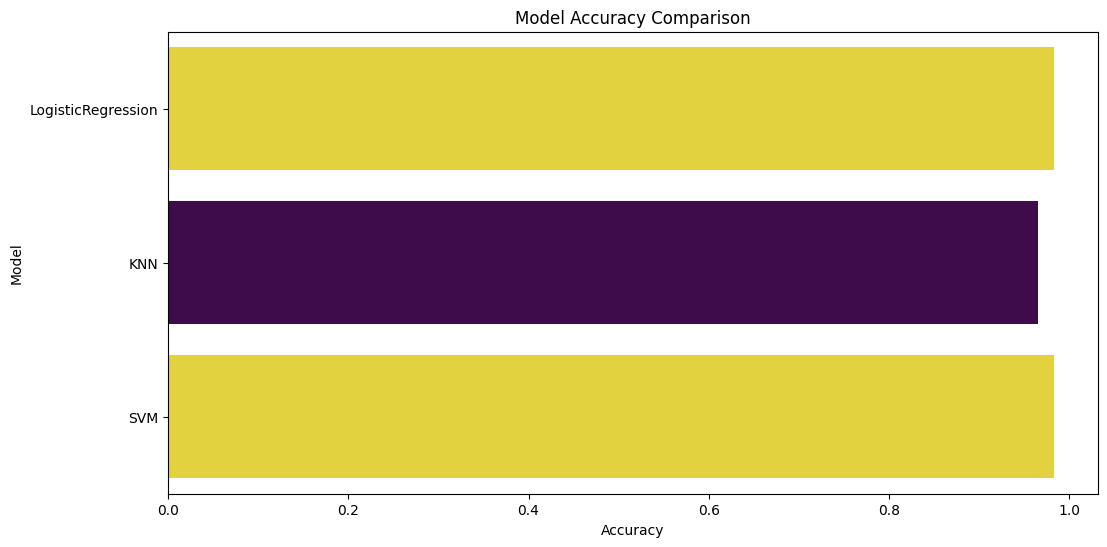

In [104]:
plt.figure(figsize=(12,6))
model_acc = [logreg_acc, knn_model_acc, svm_acc]
model_name = ['LogisticRegression', 'KNN',  'SVM']

# Modify the barplot call
sns.barplot(x=model_acc, y=model_name, hue=model_acc, palette='viridis', legend=False)

plt.title('Model Accuracy Comparison') # Add a title for clarity
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()

# Conclusion
Based on the analysis of the Breast Cancer dataset, the Logistic Regression and Support Vector Machines (SVM) models demonstrated superior performance with both achieving an accuracy of 98.24% and an AUC of 1.00 on the test set, indicating their exceptional ability to distinguish between benign and malignant tumors, while the K Nearest Neighbours model also performed well with an accuracy of 96.49% and an AUC of 0.98.